In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import hydrant.util.util as util
import pint


In [2]:
# Define dimensions
ID = 10 + np.arange(3)
seg = 20 + np.arange(5)
time = pd.date_range("2023-01-01", periods=4)  # Generating 4 time periods

# Create example data
data_vars = {}
fixed_values = [7, 4, 1]
data_vars['id'] = xr.DataArray(fixed_values, dims='ID')

# Creating variable1 with fixed values
data_vars['variable1'] = xr.DataArray(np.random.randint(1, 10, size=len(ID)), dims='ID')
# Creating variables 2 and 3 with specified units
data_vars['variable2'] = xr.DataArray(np.random.rand(len(seg), len(time)), dims=('seg', 'time'), attrs={'units': 'm**2'})
data_vars['variable3'] = xr.DataArray(np.random.rand(len(seg), len(ID)), dims=('seg', 'ID'), attrs={'units': 'K'})
data_vars['variable4'] = xr.DataArray(np.random.rand(len(time), len(seg), len(ID)), dims=('time', 'seg', 'ID'), attrs={'units': 'bar'})

# Create xarray dataset
ds = xr.Dataset(data_vars)

ds



<xarray.Dataset>
Dimensions:    (ID: 3, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3042 0.3072 ... 0.3917 0.8523

In [3]:
ds1 = util.drop_vars_with_dims(ds,
                         dims_to_drop = ['seg', 'time'])

print(ds1)

<xarray.Dataset>
Dimensions:    (ID: 3)
Dimensions without coordinates: ID
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7


In [4]:
ds2 = util.drop_vars_with_dims(ds,
                         dims_to_drop = ['seg'])

print(ds2)

<xarray.Dataset>
Dimensions:    (ID: 3)
Dimensions without coordinates: ID
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7


In [5]:
ds3 = util.keep_vars_with_dims(ds,
                        dims_to_keep = ['seg'])
print(ds3)

<xarray.Dataset>
Dimensions:    (seg: 5, time: 4, ID: 3)
Dimensions without coordinates: seg, time, ID
Data variables:
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3042 0.3072 ... 0.3917 0.8523


In [6]:
ds4 = util.vars_to_keep(ds,
                        vars_to_keep = ['variable2','variable1'])
print(ds4)

<xarray.Dataset>
Dimensions:    (seg: 5, time: 4, ID: 3)
Dimensions without coordinates: seg, time, ID
Data variables:
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable1  (ID) int64 1 2 7


In [7]:
print(ds['ID'])
print(ds['variable3'])

ds5 = util.sorted_subset(ds,
                         [7,1,8],
                         mapping = {'var_id':'id','dim_id':'ID'},
                         order_of_ids = [0,1, 3])

print(ds5['ID'])
print(ds5['variable3'])
ds5

<xarray.DataArray 'ID' (ID: 3)>
array([0, 1, 2])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 3)>
array([[0.96568194, 0.07469919, 0.59337733],
       [0.85752012, 0.47689547, 0.26658546],
       [0.8824956 , 0.33947642, 0.78887932],
       [0.51722136, 0.3917652 , 0.20738288],
       [0.52064044, 0.93780316, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K
[7 1] [0 1]
<xarray.DataArray 'ID' (ID: 2)>
array([0, 1])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 2)>
array([[0.96568194, 0.59337733],
       [0.85752012, 0.26658546],
       [0.8824956 , 0.78887932],
       [0.51722136, 0.20738288],
       [0.52064044, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K


<xarray.Dataset>
Dimensions:    (ID: 2, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 1
    variable1  (ID) int64 1 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.5934 0.8575 ... 0.2074 0.5206 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3072 0.7913 ... 0.4002 0.8523

In [8]:
print(ds['ID'])
print(ds['variable3'])

ds5 = util.sorted_subset(ds,
                         [7,1],
                         mapping = {'var_id':'id','dim_id':'ID'})

print(ds5['ID'])
print(ds5['variable3'])
ds5

<xarray.DataArray 'ID' (ID: 3)>
array([0, 1, 2])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 3)>
array([[0.96568194, 0.07469919, 0.59337733],
       [0.85752012, 0.47689547, 0.26658546],
       [0.8824956 , 0.33947642, 0.78887932],
       [0.51722136, 0.3917652 , 0.20738288],
       [0.52064044, 0.93780316, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K
<xarray.DataArray 'ID' (ID: 2)>
array([0, 1])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 2)>
array([[0.96568194, 0.59337733],
       [0.85752012, 0.26658546],
       [0.8824956 , 0.78887932],
       [0.51722136, 0.20738288],
       [0.52064044, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K


<xarray.Dataset>
Dimensions:    (ID: 2, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 1
    variable1  (ID) int64 1 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.5934 0.8575 ... 0.2074 0.5206 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3072 0.7913 ... 0.4002 0.8523

In [9]:
print(ds['ID'])
print(ds['variable3'])

ds5 = util.sorted_subset(ds,
                         [1,7],
                         mapping = {'var_id':'id','dim_id':'ID'})

print(ds5['ID'])
print(ds5['variable3'])
ds5

<xarray.DataArray 'ID' (ID: 3)>
array([0, 1, 2])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 3)>
array([[0.96568194, 0.07469919, 0.59337733],
       [0.85752012, 0.47689547, 0.26658546],
       [0.8824956 , 0.33947642, 0.78887932],
       [0.51722136, 0.3917652 , 0.20738288],
       [0.52064044, 0.93780316, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K
<xarray.DataArray 'ID' (ID: 2)>
array([0, 1])
Dimensions without coordinates: ID
<xarray.DataArray 'variable3' (seg: 5, ID: 2)>
array([[0.96568194, 0.59337733],
       [0.85752012, 0.26658546],
       [0.8824956 , 0.78887932],
       [0.51722136, 0.20738288],
       [0.52064044, 0.49935342]])
Dimensions without coordinates: seg, ID
Attributes:
    units:    K


<xarray.Dataset>
Dimensions:    (ID: 2, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 1
    variable1  (ID) int64 1 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.5934 0.8575 ... 0.2074 0.5206 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3072 0.7913 ... 0.4002 0.8523

In [10]:
print(ds['variable4'])

ds6 = util.sum_dim_id(ds,\
                      dims={'dim_time': 'time', 'dim_id': 'ID'})

print(ds6['variable4'])

<xarray.DataArray 'variable4' (time: 4, seg: 5, ID: 3)>
array([[[0.33796589, 0.30417854, 0.3071957 ],
        [0.79126507, 0.53588442, 0.51230699],
        [0.05233658, 0.14463164, 0.05399752],
        [0.83267264, 0.33608437, 0.91015414],
        [0.36111721, 0.21893675, 0.95837202]],

       [[0.97540334, 0.58593877, 0.07894894],
        [0.46916922, 0.4621312 , 0.76177082],
        [0.94891322, 0.6929262 , 0.76070969],
        [0.22108319, 0.74571166, 0.8581884 ],
        [0.38140846, 0.53323347, 0.14257016]],

       [[0.68739932, 0.99602135, 0.97852356],
        [0.60208219, 0.55653412, 0.75119981],
        [0.45252802, 0.2897606 , 0.04675727],
        [0.58400348, 0.14761888, 0.41364532],
        [0.24219288, 0.33112893, 0.18476764]],

       [[0.54057684, 0.16617126, 0.2848385 ],
        [0.68533835, 0.994159  , 0.51851095],
        [0.58098646, 0.79271038, 0.03738588],
        [0.3855151 , 0.60681614, 0.23411112],
        [0.40022199, 0.39169931, 0.85228371]]])
Dimensions witho

In [11]:
sum( np.array([0.27277571, 0.06494149, 0.75372441]) * np.array([1,2,3]) /6)

0.4439719866666666

In [12]:
ds6

<xarray.Dataset>
Dimensions:    (ID: 3, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg) float64 0.9493 1.839 0.251 ... 1.411 1.226 1.644

In [13]:
print(ds['variable4'])

ds6 = util.sum_dim_id(ds,\
                      dims={'dim_time':'time', 'dim_id': 'ID'}) #weight=[1,1,1], \

print(ds6['variable4'])

<xarray.DataArray 'variable4' (time: 4, seg: 5, ID: 3)>
array([[[0.33796589, 0.30417854, 0.3071957 ],
        [0.79126507, 0.53588442, 0.51230699],
        [0.05233658, 0.14463164, 0.05399752],
        [0.83267264, 0.33608437, 0.91015414],
        [0.36111721, 0.21893675, 0.95837202]],

       [[0.97540334, 0.58593877, 0.07894894],
        [0.46916922, 0.4621312 , 0.76177082],
        [0.94891322, 0.6929262 , 0.76070969],
        [0.22108319, 0.74571166, 0.8581884 ],
        [0.38140846, 0.53323347, 0.14257016]],

       [[0.68739932, 0.99602135, 0.97852356],
        [0.60208219, 0.55653412, 0.75119981],
        [0.45252802, 0.2897606 , 0.04675727],
        [0.58400348, 0.14761888, 0.41364532],
        [0.24219288, 0.33112893, 0.18476764]],

       [[0.54057684, 0.16617126, 0.2848385 ],
        [0.68533835, 0.994159  , 0.51851095],
        [0.58098646, 0.79271038, 0.03738588],
        [0.3855151 , 0.60681614, 0.23411112],
        [0.40022199, 0.39169931, 0.85228371]]])
Dimensions witho

In [14]:
# ds6
A = np.ones([1, 3]).flatten()
A

array([1., 1., 1.])

In [15]:
# set the unit registery for millibar
_ureg = pint.UnitRegistry(force_ndarray_like=True)
_ureg.define('millibar = 1e-3 * bar')

ds8 = util.convert_units(ds,
                         units = {'variable1':'m**2','variable2':'kelvin','variable4':'bar'},
                         unit_registry = _ureg,
                         to_units= {'variable1':'km**2','variable2':'degC','variable4':'millibar'})

ds8

<xarray.Dataset>
Dimensions:    (ID: 3, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) float64 1e-06 2e-06 7e-06
    variable2  (seg, time) float64 -272.4 -272.2 -272.2 ... -272.9 -272.7 -272.6
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg, ID) float64 338.0 304.2 307.2 ... 400.2 391.7 852.3

In [16]:
ds

<xarray.Dataset>
Dimensions:    (ID: 3, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg, ID) float64 0.338 0.3042 0.3072 ... 0.3917 0.8523

In [17]:
dims_order = [dim for dim in ds['variable4'].dims]
dims_order

['time', 'seg', 'ID']

In [18]:
# Find the index of the dimension named 'ID'
id_dim_index = ds['variable4'].dims.index('ID')
print(id_dim_index)


# Get the length of the 'ID' dimension
id_dim_length = len(ds['ID'])
print(id_dim_length)

# Create an array of ones from 1 to the length of the 'ID' dimension
ones_array = xr.DataArray(data=np.arange(1, id_dim_length + 1), dims='ID')
print(ones_array)

# Loop over the 'ID' dimension and fill it with the values from the 'ones_array'
for idx in range(id_dim_length):
    ds['variable4'].loc[{ds['variable4'].dims[id_dim_index]: idx}] = ones_array[idx]

ds

2
3
<xarray.DataArray (ID: 3)>
array([1, 2, 3])
Dimensions without coordinates: ID


<xarray.Dataset>
Dimensions:    (ID: 3, seg: 5, time: 4)
Dimensions without coordinates: ID, seg, time
Data variables:
    id         (ID) int64 7 4 1
    variable1  (ID) int64 1 2 7
    variable2  (seg, time) float64 0.7651 0.9602 0.939 ... 0.2611 0.4711 0.5597
    variable3  (seg, ID) float64 0.9657 0.0747 0.5934 ... 0.5206 0.9378 0.4994
    variable4  (time, seg, ID) float64 1.0 2.0 3.0 1.0 2.0 ... 3.0 1.0 2.0 3.0

In [1]:
import xarray as xr
import numpy as np
import cftime
from cftime import DatetimeGregorian

# Define dimensions and coordinates
start_date = cftime.DatetimeNoLeap(1980, 2, 25)
end_date = cftime.DatetimeNoLeap(1980, 3, 5)

# Create a date range excluding February 29th
time = xr.cftime_range(start=start_date, end=end_date, freq='D')

ID = np.arange(3)

# Create data array for precipitation
precipitation_data = np.random.rand(len(time), len(ID))
precipitation = xr.DataArray(precipitation_data, coords=[('time', time), ('ID', ID)])

# Create the dataset
dataset = xr.Dataset({'precipitation': precipitation})

# Set the calendar attribute
dataset['time'].attrs['calendar'] = 'noleap'

# Print the dataset
print(dataset['time'])

<xarray.DataArray 'time' (time: 9)>
array([cftime.DatetimeNoLeap(1980, 2, 25, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 2, 26, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 2, 27, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 3, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 3, 3, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 3, 4, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 3, 5, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1980-02-25 00:00:00 ... 1980-03-05 00:00:00
Attributes:
    calendar:  noleap


In [3]:

def calendar_no_leap_to_standard (data):

    # read start and end time and date from calendar no leap
    start_date = data.time.values[0].strftime("%Y-%m-%d %H:%M:%S")
    end_date = data.time.values[-1].strftime("%Y-%m-%d %H:%M:%S")

    # standard time
    standard_date = xr.cftime_range(start=start_date, end=end_date, freq='D', calendar='standard')
    standard_date_list = [str(date) for date in standard_date if not (date.year%4 == 0 and date.month == 2 and date.day == 29)]

    # return from standard_date_list
    new_time = [DatetimeGregorian.strptime(date, '%Y-%m-%d %H:%M:%S') for date in standard_date_list]

    # assign the new time that is standard without leap days as time
    data = data.assign_coords(time=new_time)

    # Extend the time dimension to include the standard calendar dates
    data = data.reindex(time=standard_date, method='pad')
    
    # return
    return data


# 
dataset = no_leap_to_standard (dataset)
dataset

<xarray.Dataset>
Dimensions:        (time: 10, ID: 3)
Coordinates:
  * time           (time) object 1980-02-25 00:00:00 ... 1980-03-05 00:00:00
  * ID             (ID) int64 0 1 2
Data variables:
    precipitation  (time, ID) float64 0.384 0.4073 0.5179 ... 0.8415 0.05858

In [45]:
import xarray as xr
import numpy as np
import cftime
from cftime import DatetimeGregorian

# Define dimensions and coordinates
start_date = cftime.Datetime360Day(1980, 7, 25)
end_date = cftime.Datetime360Day(1980, 12, 25)

# Create a date range excluding February 29th
time = xr.cftime_range(start=start_date, end=end_date, freq='D')

ID = np.arange(3)

# Create data array for precipitation
precipitation_data = np.random.rand(len(time), len(ID))
precipitation = xr.DataArray(precipitation_data, coords=[('time', time), ('ID', ID)])

# Create the dataset
dataset = xr.Dataset({'precipitation': precipitation})

# Set the calendar attribute
dataset['time'].attrs['calendar'] = 'noleap'

# Print the dataset
dataset

<xarray.Dataset>
Dimensions:        (time: 151, ID: 3)
Coordinates:
  * time           (time) object 1980-07-25 00:00:00 ... 1980-12-25 00:00:00
  * ID             (ID) int64 0 1 2
Data variables:
    precipitation  (time, ID) float64 0.9936 0.5002 0.8451 ... 0.3089 0.2997

In [43]:
def calendar_D360_to_standard (dataset):

    # read start and end time and date from calendar no leap
    start_date = dataset.time.values[0].strftime("%Y-%m-%d %H:%M:%S")
    end_date = dataset.time.values[-1].strftime("%Y-%m-%d %H:%M:%S")

    # Februrary 29 for non leap years or February 30th 
    indices_30_feb = np.where((dataset['time'].dt.month == 2) & (dataset['time'].dt.day == 30))[0]
    indices_29_feb_no_leap = np.where((dataset['time'].dt.year % 4 != 0) & (dataset['time'].dt.month == 2) & (dataset['time'].dt.day == 29))[0]

    # Get indices that are to be kept (not removed)
    indices_to_remove = np.concatenate((indices_30_feb, indices_29_feb_no_leap))
    indices_to_keep = np.setdiff1d(np.arange(len(time)), indices_to_remove)
    
    # Drop the identified indices from the dataset using isel
    dataset = dataset.isel(time=indices_to_keep)
    
    
    # standard time
    standard_date = xr.cftime_range(start=start_date, end=end_date, freq='D', calendar='standard')
    
    # create standard time without 31 days of the month to be compatibale with calendar 360D
    indices_to_remove = np.where(standard_date.day != 31)[0]

    # Drop the identified indices from the time range
    standard_date_modified = standard_date[indices_to_remove]
    
    # set coordinate
    dataset = dataset.assign_coords(time=standard_date_modified)
    
    # Extend the time dimension to include the standard calendar dates
    dataset = dataset.reindex(time=standard_date, method='pad')
    
    # return
    return dataset

# 
dataset = D360_to_standard (dataset)
dataset

<xarray.Dataset>
Dimensions:        (time: 154, ID: 3)
Coordinates:
  * time           (time) object 1980-07-25 00:00:00 ... 1980-12-25 00:00:00
  * ID             (ID) int64 0 1 2
Data variables:
    precipitation  (time, ID) float64 0.9533 0.2168 0.6614 ... 0.982 0.2147

In [17]:
import xarray as xr
import cftime
import numpy as np

# Your existing xarray dataset with 360-day calendar
# For demonstration purposes, creating a sample dataset
start_date = cftime.Datetime360Day(1981, 2, 25)
end_date = cftime.Datetime360Day(1981, 3, 5)  # Excluding Feb 29th
time = xr.cftime_range(start=start_date, end=end_date, freq='D', calendar='360_day')
ID = np.arange(3)
data = np.random.rand(len(time), len(ID))
dataset = xr.Dataset({'data': (['time', 'ID'], data)}, coords={'time': time, 'ID': ID})

# February 30th 
indices_30_feb = np.where((dataset['time'].dt.month == 2) & (dataset['time'].dt.day == 30))[0]

# Februrary 29 for non leap years
indices_29_feb_no_leap = np.where((dataset['time'].dt.year % 4 != 0) & (dataset['time'].dt.month == 2) & (dataset['time'].dt.day == 29))[0]

# Merge the two
indices_to_remove = np.concatenate((indices_30_feb, indices_29_feb_no_leap))

# Get indices that are to be kept (not removed)
indices_to_keep = np.setdiff1d(np.arange(len(time)), indices_to_remove)

# Drop the identified indices from the dataset using isel
dataset = dataset.isel(time=indices_to_keep)

# Print the updated dataset without February 29th or 30th
print(dataset)

<xarray.Dataset>
Dimensions:  (time: 9, ID: 3)
Coordinates:
  * time     (time) object 1981-02-25 00:00:00 ... 1981-03-05 00:00:00
  * ID       (ID) int64 0 1 2
Data variables:
    data     (time, ID) float64 0.9512 0.1084 0.265 ... 0.1276 0.546 0.04229


In [18]:
print(dataset['time'])

<xarray.DataArray 'time' (time: 9)>
array([cftime.Datetime360Day(1981, 2, 25, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 26, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 27, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 3, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 3, 3, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 3, 4, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 3, 5, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1981-02-25 00:00:00 ... 1981-03-05 00:00:00


In [151]:
import xarray as xr
import numpy as np
import pandas as pd

# Creating a dummy dataset
start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-01-10')
time = pd.date_range(start=start_date, end=end_date, freq='H')
ID = np.arange(3)
precipitation_data = np.random.rand(len(time), len(ID))
other_variable_data = np.random.rand(len(time))

# Create an xarray dataset
precipitation = xr.DataArray(precipitation_data, coords=[('time', time), ('ID', ID)])
other_variable = xr.DataArray(other_variable_data, coords=[('time', time)])

ds = xr.Dataset({'precipitation': precipitation, 'other_variable': other_variable})


# ds['precipitation'][:,1].plot()

# offset = -2

# ds['time'] = ds['time'].roll(time=-offset)

# if offset > 0:
#     ds = ds.isel(time=slice(None, -offset))
# elif offset < 0:
#     ds = ds.isel(time=slice(-offset, None))

# ds['precipitation'][:,1].plot()



In [154]:
import sys

def agg_hourly_to_daily(ds, offset=0, stat='mean'):
    
    import copy
    ds = copy.deepcopy(ds)
    
    # Roll the time based on the hour difference for more accurate alignment
    if offset != 0:
        ds['time'] = ds['time'].roll(time=-offset)
        if offset > 0:
            ds = ds.isel(time=slice(None, -offset))
        elif offset < 0:
            ds = ds.isel(time=slice(-offset, None))
        
    # Create the xarray dataframe with daily time
    if stat == 'max':
        ds_daily = ds.resample(time='D').max()
    elif stat == 'min':
        ds_daily = ds.resample(time='D').min()
    elif stat == 'mean':
        ds_daily = ds.resample(time='D').mean()
    elif stat == 'sum':
        ds_daily = ds.resample(time='D').sum()
    else:
        sys.exit('input stat should be max, min, mean, or sum')
    
    return ds_daily


# Aggregate hourly to daily with an offset of -12 hours and take the mean
ds_daily = agg_hourly_to_daily(ds, offset=-7, stat = 'mean')

# Print the aggregated dataset
ds_daily

<xarray.Dataset>
Dimensions:         (ID: 3, time: 9)
Coordinates:
  * ID              (ID) int64 0 1 2
  * time            (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-09
Data variables:
    precipitation   (time, ID) float64 0.4175 0.5349 0.4903 ... 0.468 0.5136
    other_variable  (time) float64 0.4925 0.514 0.4903 ... 0.4937 0.4973 0.4743

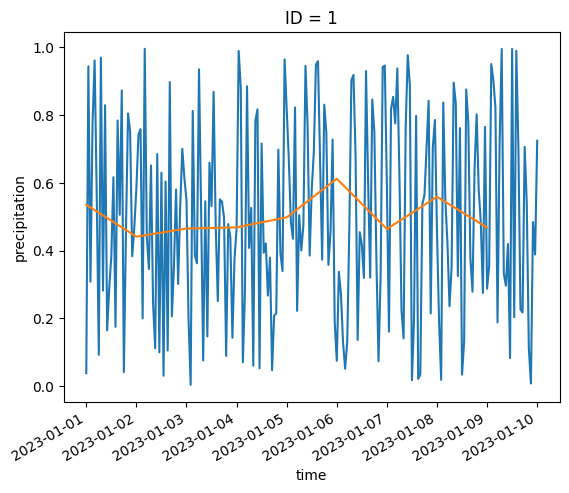

In [155]:
ds['precipitation'][:,1].plot()
ds_daily['precipitation'][:,1].plot()

In [140]:
ds_daily

<xarray.Dataset>
Dimensions:         (ID: 3, time: 10)
Coordinates:
  * ID              (ID) int64 0 1 2
  * time            (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-10
Data variables:
    precipitation   (time, ID) float64 0.5472 0.4564 0.4328 ... 0.8504 0.629
    other_variable  (time) float64 0.5512 0.5982 0.5487 ... 0.4158 0.4741 0.6206